<a href="https://colab.research.google.com/github/Ivanbh214/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
#Open the file in the github and copy the repository
url = 'https://raw.githubusercontent.com/Ivanbh214/EDA/main/avocado.csv'
df_avocado = pd.read_csv(url, sep=",", error_bad_lines=False)

In [3]:
print(df_avocado.head(5))

   Unnamed: 0        Date  AveragePrice  ...          type  year  region
0           0  2015-12-27          1.33  ...  conventional  2015  Albany
1           1  2015-12-20          1.35  ...  conventional  2015  Albany
2           2  2015-12-13          0.93  ...  conventional  2015  Albany
3           3  2015-12-06          1.08  ...  conventional  2015  Albany
4           4  2015-11-29          1.28  ...  conventional  2015  Albany

[5 rows x 14 columns]


In [4]:
df_avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df_avocado.shape

(18249, 14)

We can see that 3 columns no have name, have numbers. So, this is have to be fix

##Exploratory Data Analysis from avocado dataset
1- Transform any character in interget ato NA 

*   Select the same type of variables

*   Transform this character to NA


2- Count the number of NA 

Kaggle notebook about the avocado price EDA 

1-https://www.kaggle.com/tekdogan/eda-for-avocado-prices

2-https://www.kaggle.com/fabiorope/avocado-prices-eda

3- https://www.kaggle.com/huseyinduman/avocado-prices-data-analysis-eda

In [6]:
df_avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

**Variable categóricas**

https://towardsdatascience.com/5-methods-to-check-for-nan-values-in-in-python-3f21ddd17eed

1.   Elimination of space other characters



In [7]:
#From kaggle 3. Could be advisable to replace any character by NaN
df_avocado.columns = df_avocado.columns.str.replace(' ', '_')
df_avocado = df_avocado.drop('Unnamed:_0',1)

In [8]:
print(df_avocado.head())

         Date  AveragePrice  Total_Volume  ...          type  year  region
0  2015-12-27          1.33      64236.62  ...  conventional  2015  Albany
1  2015-12-20          1.35      54876.98  ...  conventional  2015  Albany
2  2015-12-13          0.93     118220.22  ...  conventional  2015  Albany
3  2015-12-06          1.08      78992.15  ...  conventional  2015  Albany
4  2015-11-29          1.28      51039.60  ...  conventional  2015  Albany

[5 rows x 13 columns]


In [9]:
# List of column names to clean
cols_to_clean = df_avocado[["Date", "AveragePrice", "Total_Volume", "Total_Bags", "Small_Bags", "Large_Bags", "XLarge_Bags"]]

In [10]:
# List of characters to remove
chars_to_remove = ['+', ',','$']

In [11]:
# List of column names to clean
#cols_to_clean = ['Installs', 'Price']   

In [12]:
# Loop for each column in cols_to_clean
"""for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))"""

"for col in cols_to_clean:\n    # Loop for each char in chars_to_remove\n    for char in chars_to_remove:\n        # Replace the character with an empty string\n        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))"

In [13]:
# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        cols_to_clean = cols_to_clean.apply(lambda x: x.replace(char, 'NA'))

In [14]:
type(cols_to_clean)

pandas.core.frame.DataFrame

In [15]:
cols_to_clean.head(9)

,Date,AveragePrice,Total_Volume,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags
0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0
1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0
2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0
3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0
4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0
5,2015-11-22,1.26,55979.78,6683.91,6556.47,127.44,0.0
6,2015-11-15,0.99,83453.76,8318.86,8196.81,122.05,0.0
7,2015-11-08,0.98,109428.33,6829.22,6266.85,562.37,0.0
8,2015-11-01,1.02,99811.42,11388.36,11104.53,283.83,0.0


In [16]:
"""#Detection of NA
#import pandas as pd
x = float("nan")
print(f"It's pd.isna  : {pd.isna(x)}")"""

'#Detection of NA\n#import pandas as pd\nx = float("nan")\nprint(f"It\'s pd.isna  : {pd.isna(x)}")'

In [17]:
#Para comprobar que si hay o no valores NA
#https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

cols_to_clean.isnull().values.any()

False

No hay NA presentes en el dataset

In [18]:
#Con este ejemplo se confirma que el código anterior funciona
"""import numpy as np

df = pd.DataFrame(dict(age=[5, 6, np.NaN],
                   born=[pd.NaT, pd.Timestamp('1939-05-27'),
                         pd.Timestamp('1940-04-25')],
                   name=['Alfred', 'Batman', ''],
                   toy=[None, 'Batmobile', 'Joker']))"""

"import numpy as np\n\ndf = pd.DataFrame(dict(age=[5, 6, np.NaN],\n                   born=[pd.NaT, pd.Timestamp('1939-05-27'),\n                         pd.Timestamp('1940-04-25')],\n                   name=['Alfred', 'Batman', ''],\n                   toy=[None, 'Batmobile', 'Joker']))"

In [19]:
"""df.isnull().values.any()"""

'df.isnull().values.any()'

In [20]:
"""df.head()"""

'df.head()'

In [21]:
"""df["4046"]"""

'df["4046"]'

**Exploring categories variables**


In [22]:
import matplotlib.pyplot as plt
        

In [23]:
# Print the total number of unique categories type 
num_categories_type = len(df_avocado['type'].unique())
num_categories_region = len(df_avocado['region'].unique())

print('Number of categories from type variable = ', num_categories_type)
print('Number of categories from region variable = ', num_categories_region)


Number of categories from type variable =  2
Number of categories from region variable =  54


In [24]:
# Count the number of avocado in each 'Type'. 
num_type_avocado = df_avocado['type'].value_counts()
num_type_avocado

conventional    9126
organic         9123
Name: type, dtype: int64

In [25]:
# Sort num_type_avocado in descending order based on the count of apps in each category
sorted_num_type_avocado = num_type_avocado.sort_values(ascending = False)

sorted_num_type_avocado


conventional    9126
organic         9123
Name: type, dtype: int64

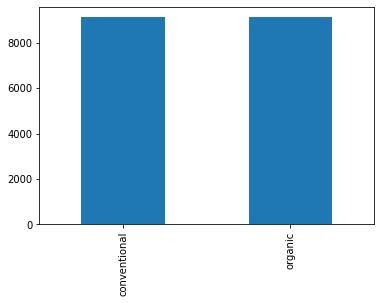

9123    1
9126    1
Name: type, dtype: int64

In [26]:
sorted_num_type_avocado.plot(kind="bar",x = num_type_avocado.index,y = num_type_avocado.values)
plt.show()
sorted_num_type_avocado.value_counts()

#**Insight from the data**
#1- Which is the most productive region?
#2- Which is the most productive type of vegetable?


1- Which is the most productive region

In [28]:
df_avocado[["region","Total_Volume","AveragePrice"]]

,region,Total_Volume,AveragePrice
0,Albany,64236.62,1.33
1,Albany,54876.98,1.35
2,Albany,118220.22,0.93
3,Albany,78992.15,1.08
4,Albany,51039.60,1.28
...,...,...,...
18244,WestTexNewMexico,17074.83,1.63
18245,WestTexNewMexico,13888.04,1.71
18246,WestTexNewMexico,13766.76,1.87
18247,WestTexNewMexico,16205.22,1.93


In [29]:
#Esto no funciona, representa solo los mas abundantes de cada campo
df_avocado[["region","Total_Volume","AveragePrice"]].max()

region          WestTexNewMexico
Total_Volume         6.25056e+07
AveragePrice                3.25
dtype: object

In [79]:
df_avocado_filter= df_avocado.groupby("region")["AveragePrice","Total_Volume"].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [80]:
type(df_avocado_filter)

pandas.core.frame.DataFrame

#The most productive state from US is West

In [97]:
Total_Volume = df_avocado_filter.sort_values(by=['Total_Volume'], ascending=False)

In [ ]:
print(Total_Volume)

In [96]:
print(Total_Volume[1:2])

        AveragePrice  Total_Volume
region                            
West            2.52   11274749.11


#The most rentable region is San_Francisco

In [84]:
df_avocado_filter.sort_values(by=['AveragePrice'], ascending=False)

,AveragePrice,Total_Volume
region,,
SanFrancisco,3.25,1706251.05
Tampa,3.17,893143.94
MiamiFtLauderdale,3.05,1310671.51
RaleighGreensboro,3.04,552900.21
LasVegas,3.03,680234.93
Jacksonville,2.99,398543.91
Seattle,2.96,1093144.23
Spokane,2.95,165785.94
WestTexNewMexico,2.93,1637554.42


#**Comprobación** 
Se realiza la comprobación de que la región mas productiva y rentable es  WestTexNewMexico y no lo es.

In [30]:
df_avocado[df_avocado["region"]== "WestTexNewMexico"]

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
2756,2015-12-27,0.71,776404.39,451904.51,141599.36,15486.97,167413.55,123158.22,33065.33,11190.00,conventional,2015,WestTexNewMexico
2757,2015-12-20,0.83,649885.76,389110.55,108176.29,12953.59,139645.33,90392.86,23535.80,25716.67,conventional,2015,WestTexNewMexico
2758,2015-12-13,0.78,646041.56,437780.91,100110.13,13576.25,94574.27,83053.10,10947.84,573.33,conventional,2015,WestTexNewMexico
2759,2015-12-06,0.74,623231.77,398871.12,133434.18,21088.12,69838.35,68233.56,1604.79,0.00,conventional,2015,WestTexNewMexico
2760,2015-11-29,0.81,519028.45,335446.83,103635.94,11463.06,68482.62,67264.73,1217.89,0.00,conventional,2015,WestTexNewMexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,2018,WestTexNewMexico


In [31]:
WestTexNewMexico = df_avocado[df_avocado["region"]== "WestTexNewMexico"]

In [73]:
df_avocado.groupby("region")

In [40]:
WestTexNewMexico["AveragePrice"].max()

2.93

In [32]:
print(WestTexNewMexico)

             Date  AveragePrice  ...  year            region
2756   2015-12-27          0.71  ...  2015  WestTexNewMexico
2757   2015-12-20          0.83  ...  2015  WestTexNewMexico
2758   2015-12-13          0.78  ...  2015  WestTexNewMexico
2759   2015-12-06          0.74  ...  2015  WestTexNewMexico
2760   2015-11-29          0.81  ...  2015  WestTexNewMexico
...           ...           ...  ...   ...               ...
18244  2018-02-04          1.63  ...  2018  WestTexNewMexico
18245  2018-01-28          1.71  ...  2018  WestTexNewMexico
18246  2018-01-21          1.87  ...  2018  WestTexNewMexico
18247  2018-01-14          1.93  ...  2018  WestTexNewMexico
18248  2018-01-07          1.62  ...  2018  WestTexNewMexico

[335 rows x 13 columns]
